# ***TWITTER SENTIMENT ANALYSIS***



###  sentiment Analysis : 
It is application of ***Natural Language Processing (NLP)*** that builds systems that try to identify and extract the sentiment content or opinions behind a series of word.”
These systems extract attributes of the expression e.g.:
- Polarity: if the speaker express a positive or negative opinion,
- Subject: the thing that is being talked about,
- Opinion holder: the person, or entity that expresses the opinion.


### Sentimental Analysis Methods:
There are many methods and algorithms to implement sentiment analysis systems
- ***Rule-based systems*** that perform analysis based on a set of manually crafted rules.
- ***Automatic systems*** that rely on machine learning techniques to learn from data.
- ***Hybrid systems that*** combine both rule based and automatic approaches.


- ***Automatic or Machine Learning*** 
In this method, we gather a training dataset with examples of expressions with a positive, negative sentiment. 
Machine learning algorithms don’t understand text directly, so we’ll need to transform those examples into vectors (a simple but effective method for doing this is bag-of-words). Next, we use those vectors to train a machine learning algorithm (such as Naive Bayes or SVM). 

We use ***Naive Bayes Classifier*** ,a machine learnig algorithm to classify tweets

### Step 1: Importing the important Libraries

In [1]:
import twitter
import matplotlib.pyplot as plt
import numpy as np
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import twitter_samples
%matplotlib inline


- ***Importing necessary library*** 

1.**twitter** is for collecting data from twitter.

2.**Numpy** is for do scientific calculation.

3.**Matplotlib** is for visualising the data.

3.**nltk** is natural language toolkit which contains various function and datasets.

 

### step 2: Authenticating our python script

In [2]:
api =twitter.Api(consumer_key='W6ZL1EjqVVDIdZg3aPmtMS9Pc',
                consumer_secret='WCKfBOpCD6qYONDrxGnQA6Qh1CcdC44B4s81qTgk1nTt5xfjFV',
                access_token_key='957000476335075328-n6jAke4RJKDGQFBoDYoGM1KtfNNmqjw',
                access_token_secret='JyZOEoLT1jN92e0qkBDVSK34kwnTYvKcqeBS1OGEskMe5')
print(api.VerifyCredentials())

{"created_at": "Fri Jan 26 21:21:08 +0000 2018", "default_profile": true, "default_profile_image": true, "followers_count": 2, "friends_count": 26, "id": 957000476335075328, "id_str": "957000476335075328", "name": "Anil Kumar", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "AnilKum8682"}


### step 3: Extracting trending hashtags

In [3]:
locationTrending = api.GetTrendsWoeid('23424848', exclude=None)
trending =[]
[trending.append(trend.name) for trend in locationTrending]
print("Trending")
trending

Trending


['#TempleTerrorAttack',
 '#MumbaiRainlive',
 '#INDvBAN',
 '#TuesdayThoughts',
 '#1MForNVNNTrailer',
 'चांदनी चौक',
 'Union Territories',
 'Gurdaspur',
 'Indian Air Force',
 'Hauz Qazi',
 'Nalasopara',
 'Know More',
 'Cox & Kings',
 'Western Railway',
 '#TirangaInJaisalmer',
 '#StopHydrocarbonNotCauvery',
 '#KKTrailerFromTomorrow',
 '#SunnyDeol',
 '#TipsToCherishGoodHealth',
 '#Media420',
 '#Tejas',
 '#savingsaccount',
 '#IndiaVsBangladesh',
 '#KodandaramiReddy',
 '#BowBow',
 '#SuperHitJiivi',
 '#ZoyaAkhtar',
 '#Jagannath',
 '#HappyBirthdayGanesh',
 '#VikatanMedai',
 '#lovingharryparty',
 '#VenkyMama',
 '#GalaxyNote10',
 '#WorldUFODay',
 '#போனிஆகாதNKP',
 '#shirleysetia',
 '#Kanchana3',
 '#RaatchasiIn3Days',
 '#RathYatra2019',
 '#MCGMUpdates',
 '#CloudComputing',
 '#Rupee',
 '#OnTheStrike',
 '#VenusWilliams',
 '#WRUpdates',
 '#RiseOfTheTigers']

### step 4: Extracting the tweets from twitter for a specific hashtag

In the **createTestData** is a function which take input from user and collect the tweets from twitter and store in variable name ***data***.

In [48]:
def createTestData(search):
    try:
        fetchData = api.GetSearch(search,count=100)
        print("We extract "+str(len(fetchData))+ " for "+search)
        return [{"text":status.text} for status in fetchData]
        #print("In try")
    except:
        print("Data is not Extracted")
        return None
search_string = input("Enter the term u want to search")
data =createTestData(search_string)

Enter the term u want to search#Dhoni
We extract 100 for #Dhoni


### step 5: Preprocessing the data

#### - Data cleaning
- The tweets from twitter data may contains *usernames,hashtag,word in other language ,extra whitespace,stopwords(like is,am,you,the...)* ,so we have to remove all of these words.

- tweets may contains the simliar words such as (like,likes ).both are same words(***stemming words***) ,so we have to remove one of them by use of **PorterStermmer( ).**

In [49]:
import re
import nltk 
from nltk import sent_tokenize
from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ensw=set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
df=[]
for i in range(len(data)):
    df.append(data[i].get("text"))
for i in range(len(df)):    
    df[i]=df[i].lower() 
    df[i]=re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', df[i])
    df[i] = re.sub('@[^\s]+', '', df[i]) # remove usernames
    df[i] = re.sub(r'#([^\s]+)', r'\1', df[i]) # remove the # in #hashtag
    df[i]= re.sub('[^a-zA-Z]',' ',df[i]) #remove words then English
    df[i]= re.sub(r'\b\w{1,2}\b', '', df[i]) # Remove words with 2 or fewer letters
    df[i] = re.sub(r'\s\s+', ' ', df[i]) # Remove whitespace (including new line characters)
    df[i] = ''.join(c for c in df[i] if c <= '\uFFFF')

## Step 6:  Analysing the tweets

- throgh BarPlot of most frequent tweets

There are 6850 words in the all tweets


<Figure size 720x720 with 0 Axes>

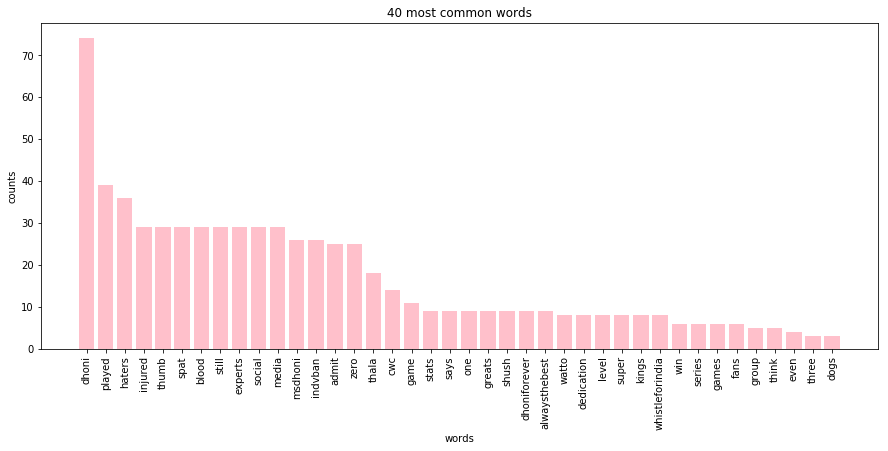

In [50]:
para=[]
for i in range(len(df)):
    para+=word_tokenize(df[i])

filterTweets=([ i for i in para if i not in ensw])
tweets='  '
tweets = tweets.join(filterTweets)

print('There are',len(tweets),'words in the all tweets')

from collections import Counter
wordfreq =Counter(filterTweets)
plt.figure(figsize=(10,10))
l=[]
co=[]
for letter, count in wordfreq.most_common(40):
    if len(letter)>2:
        l.append(letter)
        co.append(count)
x_pos = np.arange(len(l)) 
plt.figure(figsize=(15, 6))
plt.bar(x_pos, co,align='center',color='pink')
plt.xticks(x_pos, l, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.title('40 most common words')
plt.show()

We see that the word **haters** is the plural form of **hater** so,by stemming of words we merrge the same types of word.

There are 6613 words in the all tweets


<Figure size 720x720 with 0 Axes>

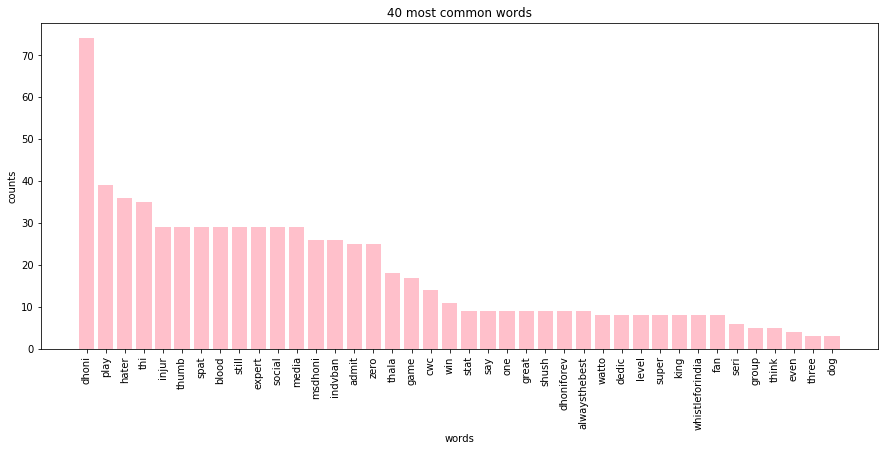

In [51]:
para=[]
for i in range(len(df)):
    para+=word_tokenize(df[i])


d=[]
for i in para: 
    d.append(ps.stem(i))
filterTweets=([ i for i in d if i not in ensw])
tweets='  '
tweets = tweets.join(filterTweets)

print('There are',len(tweets),'words in the all tweets')

from collections import Counter
wordfreq =Counter(filterTweets)
plt.figure(figsize=(10,10))
l=[]
co=[]
for letter, count in wordfreq.most_common(40):
    if len(letter)>2:
        l.append(letter)
        co.append(count)
x_pos = np.arange(len(l)) 
plt.figure(figsize=(15, 6))
plt.bar(x_pos, co,align='center',color='pink')
plt.xticks(x_pos, l, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.title('40 most common words')
plt.show()

- Plotting the words on **Wordcloud**

A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms.

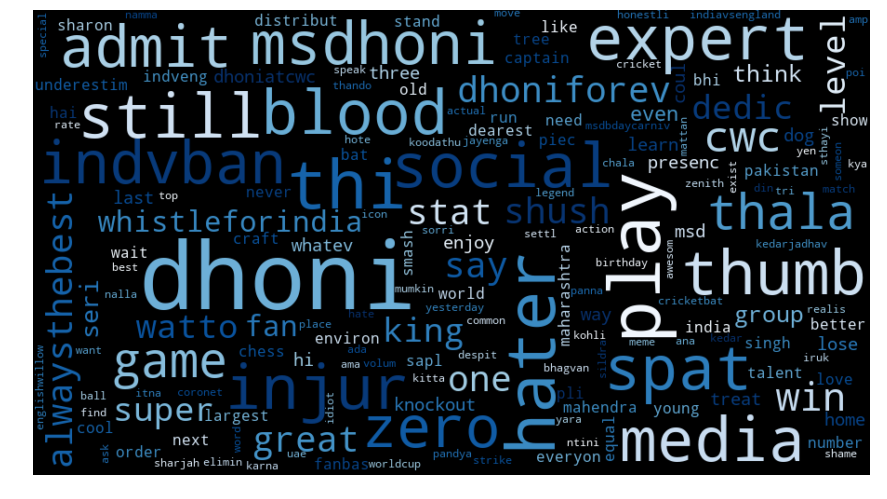

In [56]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=2000,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Step 7: Creating the model

### Naive Bayes Classifier
- In naive Bayes classifiers, every feature gets a say in determining which label should be assigned to a given input value. To choose a label for an input value, the naive Bayes classifier begins by calculating the prior probability of each label, which is determined by checking frequency of each label in the training set. The contribution from each feature is then combined with this prior probability, to arrive at a likelihood estimate for each label. The label whose likelihood estimate is the highest is then assigned to the input value

**nltk.corpus** has already given a data sets which contains the all positve and negative tweets of twitter.

### step 8: reading the training data and cleaning the data
training data may contains the emoji so we remove that emoji by doing so we can increase the accuracy of model.we have to focus on words not on emoji.

In [19]:
#twitter_samples.fileids() //gives the file name of twitter sample

neg_strings = twitter_samples.strings('negative_tweets.json')
emoji_free_neg=[]
for string in neg_strings:
    emoji_free_neg.append(string.replace(":", "").replace(")", "").replace("(", "").replace(":(",""))
    #print(string)
pos_strings = twitter_samples.strings('positive_tweets.json')
emoji_free_pos=[]
for string in pos_strings:
    emoji_free_pos.append(string.replace(":", "").replace(")", "").replace("(", "").replace(":(",""))

- Nltk Naive Bayes Classifier takes the input in specific format . it takes a list of dictonary having the label of each word.so we convert the traning data into required format.

In [20]:
def create_word_features(words):
    words = word_tokenize(words)
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict


In [21]:
pos_reviews = []
for string in emoji_free_pos:
    pos_reviews.append((create_word_features(string), "positive"))

neg_reviews = []
for string in emoji_free_neg:
    neg_reviews.append((create_word_features(string), "negative"))

## Step 9: spliting the data into train and test

- we take 4000 tweets from posive tweets and 4000 tweets from negative tweets in train set.
- and 1000 tweets from positive tweets and 1000 tweets from negative tweets in test set.

In [22]:
train_set = neg_reviews[:4000] + pos_reviews[:4000]
test_set =  neg_reviews[4000:] + pos_reviews[4000:]
print(len(train_set),  len(test_set))

8000 2000


### Step 10: Building the model and fit the model

In [55]:
classifier = NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)

75.94999999999999


In [24]:
sentiment_classifier=NaiveBayesClassifier.train(neg_reviews+pos_reviews)

## Step 11:  Predicting the sentiments of tweets by fitting in model

In [53]:
positive=0
negative=0
for i in df:
    ans=classifier.classify(create_word_features(i))
    if ans=="positive":
        positive+=1
    else:
        negative+=1

## Step 12: Visualization of Sentiments

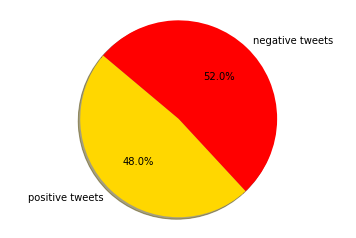

In [54]:
import matplotlib.pyplot as plt
labels = 'positive tweets', 'negative tweets'
sizes = [positive,negative]
colors = ['gold', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()